In [1]:
from matplotlib import pyplot as plt
import numpy as np

from hazma.scalar_mediator import ScalarMediator, HiggsPortal
from hazma.pseudo_scalar_mediator import PseudoScalarMFV
from hazma.vector_mediator import VectorMediator
from hazma.parameters import muon_mass as mmu
from utilities import get_tex_label, get_color, latex_text_width_1col

**Generates plots of the pion FSR spectrum for the scalar and vector-mediator models.**

In [9]:
# As noted in the text, the specific parameter values do not impact the
# FSR spectra
sm = ScalarMediator(mx=100, ms=1e3, gsxx=1., gsff=1., gsGG=1., gsFF=1.,
                    lam=246e3)
vm = VectorMediator(mx=100, mv=1e3, gvxx=1., gvuu=1., gvdd=-1., gvss=0.,
                    gvee=0., gvmumu=1.)

# Center of mass energies
e_cms = 2 * np.array([150., 250.])
# Photon energies
e_gams = np.geomspace(1, 300, num=200)

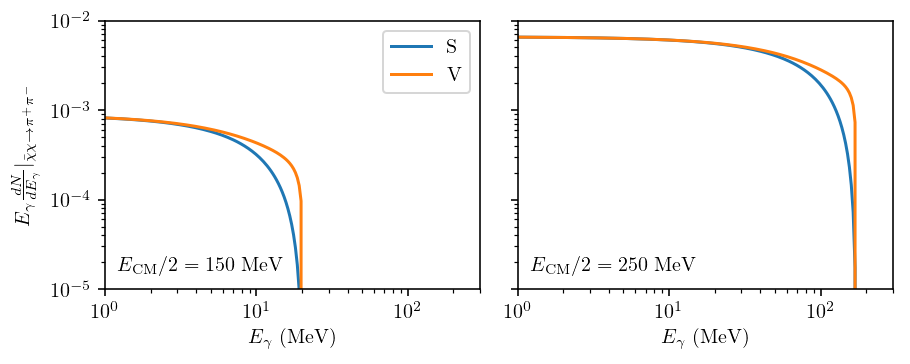

<Figure size 432x288 with 0 Axes>

In [13]:
fig, axs = plt.subplots(
    1, 2, sharex='col', sharey='row',
    figsize=(latex_text_width_1col, 0.35 * latex_text_width_1col))

for i, ax in enumerate(axs.flatten()):
    e_cm = e_cms[i]

    # Plot spectra
    ax.loglog(e_gams, e_gams * sm.dnde_pipi(e_gams, e_cm, "fsr"), label="S")
    ax.loglog(e_gams, e_gams * vm.dnde_pipi(e_gams, e_cm, "fsr"), label="V")

    # Formatting
    ax.set_xlim(e_gams[[0, -1]])
    ax.set_ylim(1e-5, 1e-2)
    ax.text(1.2, 1.5e-5, r"$E_{\mathrm{CM}}/2 = %i$ MeV" % (0.5 * e_cm), fontsize=10)
    ax.set_xlabel(r"$E_\gamma$ (MeV)")

    if i == 0:
        ax.set_ylabel(r"$E_\gamma \frac{dN}{dE_\gamma} |_{\bar{\chi}\chi \to \pi^+ \pi^-}$")
        ax.legend(loc="upper right")

fig.subplots_adjust(hspace=0.1, wspace=0.1)
plt.show()
plt.savefig("figures/pion_fsr.pdf")